<a href="https://colab.research.google.com/github/otaviodefilpo/risk-to-give-credit/blob/main/Avalia%C3%A7%C3%A3o_de_Risco_de_Cr%C3%A9dito_Ot%C3%A1vio_de_Filpo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Avaliação de Risco de Crédito


Uma das área que causa mais problemas para bancos, financiadoras e empresários é a taxa de inadimplência por parte da sua carteira de clientes.

Avaliar se uma pessoa irá deixar de cumprir com suas obrigações financeiras é de extrema importância, e pode causar um grande impacto no balanço da Instituição. Cada vez mais, soluções vêm sendo desenvolvidas e aprimoradas visando minimizar o risco de *default*. 

*Default* é o termo utilizado para indicado o não cumprimento das obrigações e/ou condições de um empréstimo (como financiamentos ou dívidas de cartão de crédito). Normalmente, o principal motivo para o descumprimento das condições de pagamento é incapacidade financeira do cliente.

<p align=center>
  <img src="http://sigmoidal.ai/wp-content/uploads/2019/10/2940191.jpg" height="300px">
</p>
 
Grandes bancos e Fintechs têm apostado cada vez mais em modelos de *Machine Learning* para previnir a inadimplência de alguns clientes.

Dentre as principais instituições financeira, o [Nubank](https://nubank.com.br/sobre-nos) é uma das que mais tem se destacado no uso de Inteligência Artificial e times de *Data Science*.

O conjunto de dados a ser utilizado neste Projeto de *Data Science* parte de uma competição realizada pela Startup [Nubank](https://nubank.com.br/sobre-nos) a fim de revelar talentos e potenciais contratações pela Fintech.

## Contextualização do Problema

Neste problema, o objetivo é prever qual a probabilidade de um cliente da Startup Nubank não coumprir com suas obrigações financeiras e deixar de pagar a sua fatura do Cartão de Crédito.

<p align=center>
<img src="http://sigmoidal.ai/wp-content/uploads/2019/10/Nubank_logo.png" width="90px"></p>
  
Vale ressaltar que essa avaliação deve ser realizada no momento em que o cliente solicita o cartão (normalmente no primeiro contato com a instituição).



> OBJETIVO: Criar um modelo que forneça a probabilidade de um cliente virar inadimplente.


Espera-se que um modelo seja capaz de minimizar as perdas financeiras do Nubank, porém minimizando também os falsos positivos.

### Hipóteses Iniciais

## Importar os Dados

Os dados que serão utilizados nesta análise estão disponíveis para download por meio [deste link](http://dl.dropboxusercontent.com/s/xn2a4kzf0zer0xu/acquisition_train.csv?dl=0). Consiste basicamente em um arquivo `csv` contendo 45.000 entradas e 43 colunas.

Este arquivo será importando para uma estrutura *DataFrame* utilizando a biblioteca `pandas` a fim de possibilitar sua manipulação e análise.

In [214]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [215]:
# Importando os dados
data = pd.read_csv("http://dl.dropboxusercontent.com/s/xn2a4kzf0zer0xu/acquisition_train.csv?dl=0")

# Criando um backup
df = data.copy()

# Observando o Tamanho do Dataset
print("O dataset possui {} entradas e {} variáveis".format(df.shape[0], df.shape[1]))

O dataset possui 45000 entradas e 43 variáveis


# **Análise exploratória de dados**

A primeira coisa ao importar o Dataset será entender melhor como os dados estão dispostos

In [216]:
# Visualizando as 3 primeiras entradas do dataset
df.head(3)

,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,reason,income,facebook_profile,state,zip,channel,job_name,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_applied,application_time_in_funnel,email,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_first_name,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,target_fraud
0,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,36.0,0.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65014.12,True,sjJbkqJS7cXalHLBFA+EOQ==,Ernn+uVXCMq/6ARrBCcd+A==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,NaN,0.0,0.0,18.0,18.0,07:52:34,444,outlook.com,NaN,2,0.0,51.0,leidelaura,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,57849.0,BR-MT,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
1,bc2c7502-bbad-0f8c-39c3-94e881967124,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,NaN,NaN,39726.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,100018.91,False,xsd3ZdsI3356I3xMxZeiqQ==,rlWIXTBO+VOa34+SpGyhlQ==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,50.0,0.0,0.0,14.0,14.0,02:34:29,346,gmail.com,0.0,1,0.0,17.0,diocezio,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,4902.0,BR-RS,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,NaN
2,669630dd-2e6a-0396-84bf-455e5009c922,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,36.0,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65023.65,NaN,Ygq6MsM98oC8yceExr69Ig==,PjTIDfJsK0DKL9fO7vuW2g==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0.0,0.0,10.0,NaN,00:60:02,6,gmail.com,NaN,2,NaN,9.0,veralucia,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,230-6097993,163679.0,BR-RR,50985,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN


In [217]:
# Observando os tipos de dados
df.dtypes.sort_values()

external_data_provider_credit_checks_last_month       int64
shipping_zip_code                                     int64
external_data_provider_fraud_score                    int64
application_time_in_funnel                            int64
n_bankruptcies                                      float64
n_issues                                            float64
n_accounts                                          float64
n_defaulted_loans                                   float64
external_data_provider_credit_checks_last_year      float64
ok_since                                            float64
external_data_provider_email_seen_before            float64
reported_income                                     float64
income                                              float64
last_borrowed_in_months                             float64
last_amount_borrowed                                float64
risk_rate                                           float64
score_6                                 

In [218]:
# Observando a porcentagem de valores ausentes
((df.isnull().sum())/(df.shape[0])).sort_values(ascending = False)

target_fraud                                        0.966178
last_amount_borrowed                                0.665689
last_borrowed_in_months                             0.665689
ok_since                                            0.589889
external_data_provider_credit_checks_last_2_year    0.502844
external_data_provider_credit_checks_last_year      0.336089
credit_limit                                        0.306667
n_issues                                            0.256533
facebook_profile                                    0.099067
marketing_channel                                   0.079511
job_name                                            0.074133
target_default                                      0.072422
external_data_provider_email_seen_before            0.049622
lat_lon                                             0.030289
user_agent                                          0.016044
n_bankruptcies                                      0.015489
n_defaulted_loans       

O que vemos nessas primeiras visualizações é que o dataset é bem diverso, com grande variedade de variáveis numéricas e categóricas, com muitas tento um número significativo de valores ausentes, o que logo mais nos fará trabalhar um pouco em cima dos dados. A seguir, vamos verificar as informações estatísticas do dataset.

In [219]:
# Valores estatísticos com describe
df.describe()

,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income,shipping_zip_code
count,44438.000000,45000.000000,45000.000000,45000.000000,44438.000000,15044.000000,15044.000000,31200.000000,4.443800e+04,18455.000000,44303.000000,44426.000000,44438.000000,33456.000000,45000.000000,22372.0,45000.000000,29876.000000,42767.000000,45000.000000,45000.00,45000.000000
mean,347.983258,100.006797,0.500037,99.925228,0.296717,13782.341991,41.763893,34381.951154,7.160739e+04,35.069737,0.076270,0.004569,10.696701,11.068119,247.537000,0.0,1.501067,0.503381,12.534781,500.399800,inf,33923.514844
std,110.429165,3.178080,0.288326,10.016549,0.101933,8077.571933,10.252705,36586.982218,5.185897e+04,21.663194,0.274052,0.079400,4.592463,4.595501,146.118398,0.0,1.114941,0.499997,126.530487,287.968873,NaN,12692.406382
min,0.000000,86.191572,0.000035,60.663039,0.000000,1005.180000,36.000000,0.000000,4.821180e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,-999.000000,0.000000,403.00,12001.000000
25%,270.000000,97.867036,0.252150,93.198353,0.220000,7519.502500,36.000000,10000.000000,4.501078e+04,17.000000,0.000000,0.000000,7.000000,8.000000,120.000000,0.0,1.000000,0.000000,11.000000,252.000000,50948.25,22937.000000
50%,340.000000,100.018900,0.500753,99.974796,0.290000,12023.465000,36.000000,25647.000000,6.126676e+04,32.000000,0.000000,0.000000,10.000000,10.000000,248.000000,0.0,2.000000,1.000000,27.000000,503.000000,101779.00,33896.000000
75%,420.000000,102.141797,0.748816,106.640275,0.360000,19220.270000,36.000000,47086.750000,8.601923e+04,50.000000,0.000000,0.000000,13.000000,14.000000,375.000000,0.0,2.000000,1.000000,43.000000,747.000000,151337.25,44910.000000
max,990.000000,113.978234,0.999973,142.192400,0.900000,35059.600000,60.000000,448269.000000,5.000028e+06,141.000000,5.000000,5.000000,49.000000,49.000000,500.000000,0.0,3.000000,1.000000,59.000000,1000.000000,inf,56000.000000


Para finalizar, vamos visualizar como está o balanceamento da variável alvo.

False    35080
True      6661
Name: target_default, dtype: int64

Os valores da classe True representam 14.8% da variável



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


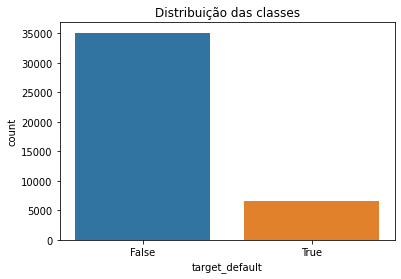

In [220]:
#Verificando o balanceamento
print(df.target_default.value_counts())
print("\nOs valores da classe True representam {:.1f}% da variável\n".format(((df[df['target_default']==True].shape[0] / df.shape[0])*100)))

#Plotando o gráfico do balanceamento
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot('target_default', data=df, ax=ax)
ax.set_title('Distribuição das classes')
plt.plot();

### Após a análise exploratória, conseguimos fazer observações importantes:

* A variável `external_data_provider_credit_checks_last_2_year` possui todas as informações estatísticas iguais à 0, logo futuramente será removida.
* A variável `ids` é única, logo pouco relevante para a construção do modelo, então será removida futuramente.
* A nossa variável alvo é `target_default`, que está desbalanceada.
* A variável `target_fraud` possui muitos valores NaN, então deve ser tratada com cuidado
* As variáveis `score_4`, `score_5`, `score_6` e outras possuem muitos valores únicos, logo poderão ser removidas futuramente.
* A variável `external_data_provider_email_seen_before` possui valor mínimo '-999', que poderá ser subistuído por NaN, para ser utilizado no projeto
* A variável `reported_income` tem um valor 'inf', que pode ser subistuído por Nan, para ser utilizado no projeto.
* A variável `channel` tem um valor único, é apenas uma identificadora dos dados, logo poderá ser removida.





#**Limpeza dos dados**
Uma vez que já detalhamos algumas coisas a corrigir no dataset, vamos remover as variáveis inconsistentes e tratar as que podemos.



In [221]:
#Criando Backup para prosseguir
dfclean = df.copy()
dfclean.head(3)

,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,reason,income,facebook_profile,state,zip,channel,job_name,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_applied,application_time_in_funnel,email,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_first_name,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,target_fraud
0,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,36.0,0.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65014.12,True,sjJbkqJS7cXalHLBFA+EOQ==,Ernn+uVXCMq/6ARrBCcd+A==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,NaN,0.0,0.0,18.0,18.0,07:52:34,444,outlook.com,NaN,2,0.0,51.0,leidelaura,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,57849.0,BR-MT,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
1,bc2c7502-bbad-0f8c-39c3-94e881967124,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,NaN,NaN,39726.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,100018.91,False,xsd3ZdsI3356I3xMxZeiqQ==,rlWIXTBO+VOa34+SpGyhlQ==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,50.0,0.0,0.0,14.0,14.0,02:34:29,346,gmail.com,0.0,1,0.0,17.0,diocezio,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,4902.0,BR-RS,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,NaN
2,669630dd-2e6a-0396-84bf-455e5009c922,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,36.0,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65023.65,NaN,Ygq6MsM98oC8yceExr69Ig==,PjTIDfJsK0DKL9fO7vuW2g==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0.0,0.0,10.0,NaN,00:60:02,6,gmail.com,NaN,2,NaN,9.0,veralucia,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,230-6097993,163679.0,BR-RR,50985,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN


Agora vamos apenas remover as variáveis que não podemos trabalhar.

In [222]:
# Dropando variáveis que não usaremos
dfclean = dfclean.drop(columns=['ids','target_fraud','external_data_provider_credit_checks_last_2_year','channel','reason','zip','job_name',
                                'external_data_provider_first_name','shipping_zip_code','user_agent','profile_tags','email','marketing_channel',
                                'profile_phone_number','facebook_profile','lat_lon','application_time_applied','shipping_state'])

Agora vamos tratar as variáveis que possuem algum valor diferente do esperado.

In [223]:
# substituir inf por nan em reported_income 
dfclean['reported_income'] = dfclean['reported_income'].replace(np.inf,np.nan)

# Subistituir -999 em external_data_provider_email_seen_before por NaN
dfclean.loc[dfclean['external_data_provider_email_seen_before'] == -999.0,
            'external_data_provider_email_seen_before'] = np.nan

#eliminar os NaNs de target_default
dfclean.dropna(subset=['target_default'], inplace=True)

Antes de prosseguir, vamos visualizar novamente a situação do nosso Dataset.

In [224]:
# Tamanho do Dataset
print("O Dataset possui {} linhas e {} colunas".format(dfclean.shape[0], dfclean.shape[1]))

O Dataset possui 41741 linhas e 25 colunas


In [225]:
# Visualizando as primeiras linhas do novo dataset
dfclean.head(3)

,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,state,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income
0,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,36.0,0.0,65014.12,sjJbkqJS7cXalHLBFA+EOQ==,N5/CE7lSkAfB04hVFFwllw==,NaN,0.0,0.0,18.0,18.0,444,2,0.0,51.0,645,57849.0
1,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,NaN,NaN,39726.0,100018.91,xsd3ZdsI3356I3xMxZeiqQ==,N5/CE7lSkAfB04hVFFwllw==,50.0,0.0,0.0,14.0,14.0,346,1,0.0,17.0,243,4902.0
2,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,36.0,NaN,65023.65,Ygq6MsM98oC8yceExr69Ig==,n+xK9CfX0bCn77lClTWviw==,NaN,0.0,0.0,10.0,NaN,6,2,NaN,9.0,65,163679.0


Para prosseguir, agora veremos como cada variável que temos está em quantidade de valores ausentes, após as nossas mudanças.

In [226]:
# Observando a porcentagem de valores ausentes
((dfclean.isnull().sum())/(dfclean.shape[0])).sort_values(ascending = False)

last_amount_borrowed                               0.661412
last_borrowed_in_months                            0.661412
ok_since                                           0.586114
external_data_provider_credit_checks_last_year     0.335905
credit_limit                                       0.314056
n_issues                                           0.261685
external_data_provider_email_seen_before           0.064110
n_bankruptcies                                     0.003234
reported_income                                    0.001581
n_defaulted_loans                                  0.000287
risk_rate                                          0.000000
score_3                                            0.000000
score_4                                            0.000000
score_5                                            0.000000
score_6                                            0.000000
score_2                                            0.000000
score_1                                 

In [227]:
# Observando os valores únicos
dfclean.nunique().sort_values(ascending=True)

target_default                                         2
external_data_provider_credit_checks_last_year         2
last_borrowed_in_months                                2
external_data_provider_credit_checks_last_month        4
n_defaulted_loans                                      5
real_state                                             5
n_bankruptcies                                         6
score_1                                                7
score_2                                               35
n_issues                                              44
n_accounts                                            44
state                                                 50
external_data_provider_email_seen_before              61
risk_rate                                             81
score_3                                               87
ok_since                                             100
application_time_in_funnel                           501
external_data_provider_fraud_sc

Temos muitos valores ausentes nas variáveis `last_amount_borrowed`, `last_borrowed_in_months` e `n_issues`, portanto vamos substituir os valores NaN por 0

In [229]:
# Substituição de valores ausentes
dfclean.last_amount_borrowed.fillna(value=0, inplace=True)
dfclean.last_borrowed_in_months.fillna(value=0, inplace=True)
dfclean.n_issues.fillna(value=0, inplace=True)

Agora vamos usar o comando `SimpleImputer` do Scikit Learn, que facilita a substituição de valores ausentes, por algum valor que você deseja no seu dataset.

Primeiramente dividiremos as variáveis entre numéricas e categóricas para conseguirmos tratá-las.

Para as variáveis numéricas, substituiremos os valores ausentes pela mediana da variável.

Já para as variáveis categóricas, substuiremos os valores ausentes pelo valor mais frequente da variável.

In [230]:
# Dividindo entre variáveis categóricas e numéricas.
from sklearn.impute import SimpleImputer

numericas = dfclean.select_dtypes(exclude='object').columns
categoricas = dfclean.select_dtypes(include='object').columns

# Variáveis numéricas.
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer = imputer.fit(dfclean.loc[:,numericas])
dfclean.loc[:,numericas]= imputer.transform(dfclean.loc[:,numericas])

# Variáveis categóricas.
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer = imputer.fit(dfclean.loc[:,categoricas])
dfclean.loc[:,categoricas] = imputer.transform(dfclean.loc[:,categoricas])

Agora verifiquemos se as nossas mudanças puderam ser aplicadas para todas as variáveis.

In [231]:
# verificar a quantidade de dados nulos
dfclean.isnull().sum()

target_default                                     0
score_1                                            0
score_2                                            0
score_3                                            0
score_4                                            0
score_5                                            0
score_6                                            0
risk_rate                                          0
last_amount_borrowed                               0
last_borrowed_in_months                            0
credit_limit                                       0
income                                             0
state                                              0
real_state                                         0
ok_since                                           0
n_bankruptcies                                     0
n_defaulted_loans                                  0
n_accounts                                         0
n_issues                                      

In [232]:
dfclean.head(3)

,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,state,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income
0,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,36.0,0.0,65014.12,sjJbkqJS7cXalHLBFA+EOQ==,N5/CE7lSkAfB04hVFFwllw==,32.0,0.0,0.0,18.0,18.0,444.0,2.0,0.0,51.0,645.0,57849.0
1,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,0.00,0.0,39726.0,100018.91,xsd3ZdsI3356I3xMxZeiqQ==,N5/CE7lSkAfB04hVFFwllw==,50.0,0.0,0.0,14.0,14.0,346.0,1.0,0.0,17.0,243.0,4902.0
2,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,36.0,25213.0,65023.65,Ygq6MsM98oC8yceExr69Ig==,n+xK9CfX0bCn77lClTWviw==,32.0,0.0,0.0,10.0,0.0,6.0,2.0,1.0,9.0,65.0,163679.0


Agora que já vimos que as substituições funcionaram, vamos preparar os dados.

# Preparação dos dados
Antes de partir para a preparação, vamos instalar os pacotes necessários

In [233]:
# Importando Bibliotecas necessárias
!pip install scikit-plot -q
import scikitplot as skplt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

from imblearn.under_sampling import RandomUnderSampler

Primeiramente, vamos padronizar os dados numéricos, para melhorar a qualidade do modelo.

In [234]:
# Criando um dataset para backup
scaled_df = dfclean.copy()

In [235]:
# Padronizando as colunas numericas

numericas = scaled_df.drop('target_default',
                           axis=1).select_dtypes(exclude='object').columns

scaled_df[numericas] = StandardScaler().fit_transform(scaled_df[numericas].values)

Agora para as variáveis categóricas, vamos utilizar a função `LabelEnconder`, que substitui as variáveis categóricas por números.

In [236]:
# Criando uma cópia do df anterior
encoded_df = scaled_df.copy()

In [237]:
# Extrair as colunas categóricas
categoricas = encoded_df.select_dtypes('object').columns

# Usando o LabelEncoder
for col in categoricas:
  encoded_df[col+'_encoded'] = LabelEncoder().fit_transform(encoded_df[col])
  encoded_df.drop(col, axis=1, inplace=True)

In [238]:
print(encoded_df)

       target_default   score_3  ...  state_encoded  real_state_encoded
0               False  0.032154  ...             44                   1
1               False  0.213805  ...             47                   1
2                True  0.122980  ...             32                   3
3               False  1.485366  ...             23                   3
4               False  1.394540  ...             47                   3
...               ...       ...  ...            ...                 ...
44995           False -0.603626  ...             46                   1
44996           False  0.213805  ...             36                   1
44997           False -0.603626  ...             47                   4
44998            True -0.966929  ...             47                   1
44999           False  1.667017  ...             16                   3

[41741 rows x 25 columns]


Com os dados tratados, podemos partir para os preparativos definitivos por modelo.

Vamos definir o X e Y inicial

In [239]:
# separando variáveis em X e y
X = encoded_df.drop('target_default', axis=1)
y = encoded_df['target_default']

Primeiro vamos balancear os dados de treino, pois já vimos anteriormente que estão bem desbalanceados.

True     6661
False    6661
dtype: int64


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


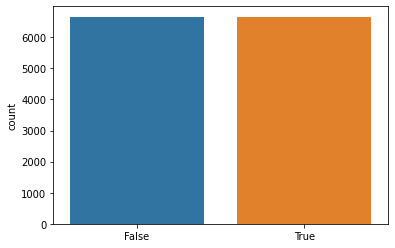

In [240]:
# # Balanceando os dados
rus = RandomUnderSampler()
X, y = rus.fit_sample(X, y)

# Ver o resultado do balanceamento
print(pd.Series(y).value_counts())

# Plotando o balanceamento
sns.countplot(y)

Agora vamos dividir os dados em treino e teste

In [241]:
# Dividindo em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

# Construindo o Modelo
Antes de construir o modelo, vamos importar os pacotes necessários.

In [242]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

Relembrando o nosso problema de negócios, estamos trabalhando informações que terão um fim bancário, com objetivo de prever quais clientes estão mais propensos à serem inadimplentes. Logo, é interessante para nós que tenhamos um número de falsos negativos baixo, pois para o nosso negócio é possível afirmar que é melhor negar mais crédito a alguém que pagaria (Um falso positivo), do que aprovar o crédito a um inadimplente (Falso negativo). 

A métrica que nos atende é o recall, que tem a seguinte fórmula.

Recall = TruePositives / (TruePositives + FalseNegatives

Então vamos adotá-la.

In [243]:
# Avaliação da Baseline, com métrica recall
def val_model(X,y,clf, quite= False):
  
  X = np.array(X)
  y = np.array(y)

  pipeline = make_pipeline(StandardScaler(), clf)
  scores = cross_val_score(pipeline, X, y, scoring = "recall")
  if quite == False:
    print("Recall: {:.4f} (+/- {:.2f})".format(scores.mean(), scores.std()))

  return scores.mean()

In [244]:
# Criar baseline e ver desempenho
rfcl = RandomForestClassifier()

score_baseline = val_model(X_train, y_train, rfcl)

Recall: 0.6001 (+/- 0.01)


Com valor baixo de Recall, vamos tentar melhorar, testando outros classificadores.

* Random Forest Classifier (Baseline)
* Decision Tree Classifier
* SGD Classifier
* SVC
* Logistic Regression
* XGB Classifier
* LGBM Classifier


In [245]:
# Modelos
rfcl = RandomForestClassifier()
dt = DecisionTreeClassifier()
sgdc = SGDClassifier()
svc = SVC()
lr = LogisticRegression()
xgb = XGBClassifier()
lgbm = LGBMClassifier()

model = []
recall = []

# Avaliar o desempenho
for clf in (rfcl, dt, sgdc, svc, lr, xgb, lgbm):
  model.append(clf.__class__.__name__)
  recall.append(val_model(X_train, y_train, clf, quite=True))

pd.DataFrame(data=recall, index=model, columns=['recall'])

,recall
RandomForestClassifier,0.597091
DecisionTreeClassifier,0.545927
SGDClassifier,0.577821
SVC,0.577822
LogisticRegression,0.589166
XGBClassifier,0.612501
LGBMClassifier,0.622139


Com as métricas sendo comparadas, o `XGBClassifier`, foi o que se saiu melhor, então vamos buscar melhorar este. O comando `get_params` vai nos mostrar as métricas inicias adotadas para o XGBClassifier

In [246]:
# Observando os parâmetros do XGBC
xgb.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

Vamos fazer algumas pequenas mudanças para buscar melhorar o desempenho.

In [247]:
# instanciando o modelo e treinando o mesmo
ml_model = XGBClassifier(learning_rate=0.1, max_depth=1, gamma=5,
                         n_estimators= 1000, min_child_weight=1, 
                         subsample = 0.5, colsample_bytree = 0.1,
                         random_state=42)

ml_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.1, gamma=5,
              learning_rate=0.1, max_delta_step=0, max_depth=1,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.5, verbosity=1)

In [248]:
y_pred = ml_model.predict(X_test)

# imprimir a acurácia do modelo
print("Recall: {:.4f}\n".format(accuracy_score(y_test, y_pred)))

Recall: 0.6202



# Conclusão
Como vimos, o nosso valor de Recall foi bem baixo, mesmo o XGBClassifier, o modelo conseguiu melhorar apenas em 0.2 pontos percentuais no desempenho original do modelo. Portanto, fica a recomendação a busca de novos métodos para este dataset, que está com métricas do modelo bastante insatisfatórias.